In [2]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

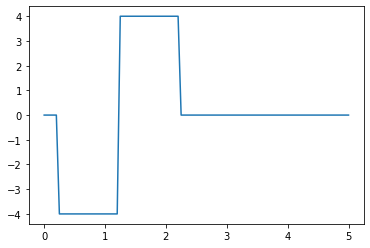

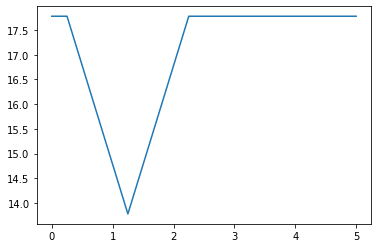

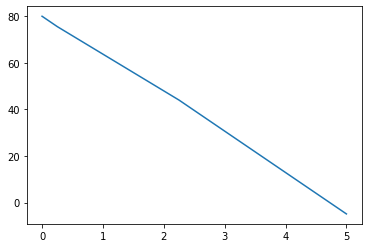

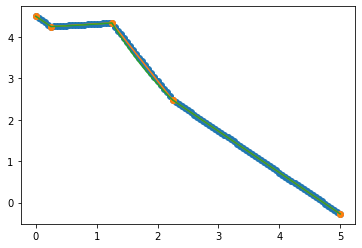

In [3]:
# this function will be a part of 02_fit_model.py
T_dur = 5.0
t = np.linspace(0, T_dur, 101)

acceleration_timings = np.array([0., 0.25, 1.25, 2.25] + [T_dur])

d_0 = 80
tta_0 = 4.5
v_0 = d_0/tta_0
a_condition = np.array([0., -4., 4., 0., 0.])
v_condition = np.concatenate([[v_0], v_0+np.cumsum(np.diff(acceleration_timings)*a_condition[:-1])])
d_condition = np.concatenate([[d_0], d_0-np.cumsum(np.diff(acceleration_timings)*(v_condition[1:]+v_condition[:-1])/2)])
tta_condition = d_condition/v_condition

# acceleration is piecewise-constant
f_a = interpolate.interp1d(acceleration_timings, a_condition, kind=0, fill_value="extrapolate", bounds_error=False)
# under piecewise-constant acceleration, v is piecewise-linear
f_v = interpolate.interp1d(acceleration_timings, v_condition, kind=1, fill_value=(v_0, v_0), bounds_error=False)
f_tta = interpolate.interp1d(acceleration_timings, tta_condition, kind=1, fill_value="extrapolate")
# under piecewise-linear v, d is piecewise-quadratic, but piecewise-linear approximation is very close
f_d = interpolate.interp1d(acceleration_timings, d_condition, kind=1, fill_value="extrapolate")

a_t = f_a(t)
v_t = f_v(t)
d_t = f_d(t)
tta_t = f_tta(t)

plt.plot(t, a_t)
plt.figure()
plt.plot(t, v_t)
plt.figure()
plt.plot(t, d_t)
plt.figure()
plt.plot(t, tta_t, marker="o")
plt.plot(acceleration_timings, tta_condition, marker="o")
plt.plot(t, d_t/v_t)

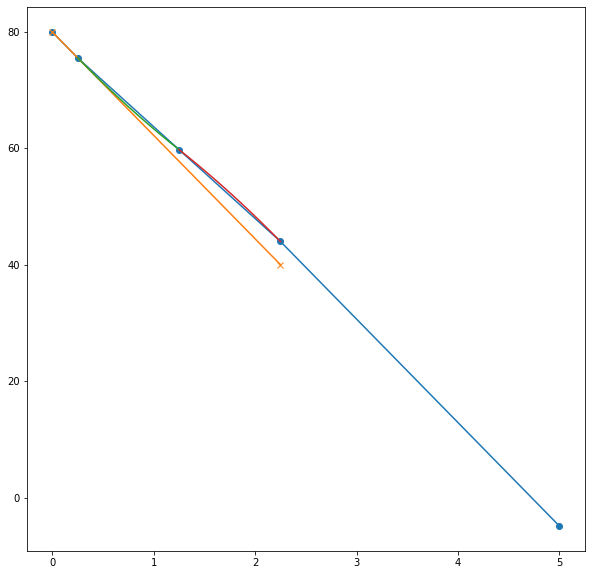

In [4]:
plt.figure(figsize=(10,10))
plt.plot(acceleration_timings, d_condition, marker="o")
plt.plot([0, 2.25], [80, 80-2.25*17.77], marker="x")
t_1 = np.linspace(0.25, 1.25, 11)
d_1 = d_condition[1] - v_condition[1]*(t_1-t_1[0]) - a_condition[1]*(t_1-t_1[0])**2/2
t_2 = np.linspace(1.25, 2.25, 11)
d_2 = d_condition[2] - v_condition[2]*(t_2-t_2[0]) - a_condition[2]*(t_2-t_2[0])**2/2
plt.plot(t_1, d_1)
plt.plot(t_2, d_2)

In [6]:
T_dur = 5.0
breakpoints = np.array([0., 0.25, 1.25, 2.25] + [T_dur])

def get_state_interp_f(tta_0, d_0, a_condition):
    v_0 = d_0/tta_0
    a_values = np.concatenate([a_condition, [0.]])
    v_values = np.concatenate([[v_0], v_0+np.cumsum(np.diff(breakpoints)*a_values[:-1])])
    d_values = np.concatenate([[d_0], d_0-np.cumsum(np.diff(breakpoints)*(v_values[1:]+v_values[:-1])/2)])
    tta_values = d_values/v_values

    # acceleration is piecewise-constant
    f_a = interpolate.interp1d(breakpoints, a_values, kind=0)
    # under piecewise-constant acceleration, tta is piecewise-linear
    # f_v = interpolate.interp1d(acceleration_timings, v_condition, kind=1, fill_value=(v_0, v_0), bounds_error=False)
    f_tta = interpolate.interp1d(breakpoints, tta_values, kind=1)
    # under piecewise-linear v, d is piecewise-quadratic, but piecewise-linear approximation is very close
    f_d = interpolate.interp1d(breakpoints, d_values, kind=1)

    return f_tta, f_d, f_a

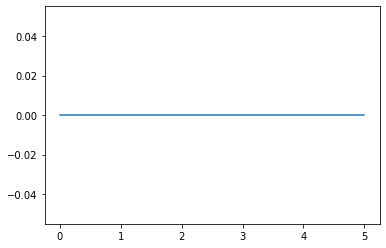

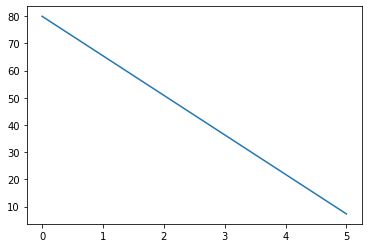

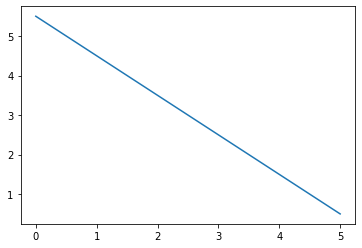

In [10]:
f_tta, f_d, f_a = get_state_interp_f(5.5, 80, [0, 0, 0, 0])

t = np.linspace(0, T_dur, 101)
tta_t = f_tta(t)
d_t = f_d(t)
a_t = f_a(t)

plt.plot(t, a_t)
plt.figure()
plt.plot(t, d_t)
plt.figure()
plt.plot(t, tta_t)

In [15]:
interpolators = {str([tta_0, d_0, a]): get_state_interp_f(tta_0, d_0, a)
                 for tta_0 in [4.5, 5.5]
                 for d_0 in [80.]
                 for a in [[0., 0., 0., 0.], [0., 4., -4., 0.]]}

In [17]:
f_tta, f_d, f_a = interpolators[str([4.5, 80., [0., 4., -4., 0.]])]